In [175]:
# reference https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/timeline.html
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
%matplotlib inline

names_w_dates = ['Nicolas Copernicus(1473-1543)', 'Johannes Kepler(1571-1630)', 'Galileo(1564-1642)', 
         'Issac Newton(1642-1727)','Niccolo Machiavelli(1469-1527)','Francis Bacon(1561-1626)',
         'Thomas Hobbes(1588-1679)','Rene Descartes(1596-1650)','Benedict Spinoza(1632-1677)',
        'Gottfried Wilhelm Leibniz(1646-1716)','John Locke(1632-1704)','George Berkeley(1685-1753)',
        'David Hume(1711-1776)','Edmund Berke(1729-1797)','Voltaire(1694-1778)','Montesquieu(1689-1755)',
        'Denis Diderot(1713-1784)','Jean-Jacques Rousseau(1712-1778)','Immanuel Kant(1724-1804)',
        'Arthur Schopenhauer(1788-1860)','Johann Gottlieb Fichte(1762-1814)','Friedrich Schelling(1775-1831)',
        'Georg Wilhelm Friedrich Hegel(1770-1831)','Karl Marx(1818-1883)','Friedrich Nietzsche(1844-1900)',
        'Jeremy Bentham(1748-1832)','John Stuart Mill(1806-1873)','Charles Sanders Perice(1839-1914)',
        'William James(1842-1910)','John Dewey(1859-1952)','Gottlob Frege(1848-1925)','Betrand Russell(1872-1970)',
        'Although Ludwig Wittgenstein(1889-1951)','Soren Kierkegaard(1813-1855)','Martin Heidegger(1889-1976)',
        'Henri Bergson(1859-1941)','Jean-Paul Sartre(1905-1980)','Albert Camus(1913-1960)',
         'Maurice Merleau-Ponty(1908-1961)','Albert Einstein(1879-1955)','Karl Popper(1902-1994)']

Nationality=['Polish','German','Italian','British','Italian','British','British','French','Dutch',
            'German','British','British','British','British','French','French','French','French',
            'German','German','German','German','German','German','German','British','British',
            'American','American','American','German','British','British','Danish','German','French',
            'French','French','French','German','British']

names = [n.split('(')[0] for n in names_w_dates]
birth_year = [n.split('(')[1][:4] for n in names_w_dates]
dead_year = [n.split('(')[1][5:9] for n in names_w_dates]
dates = [ '(' + n.split('(')[1] for n in names_w_dates]

# Convert date strings (e.g. 2014-10-18) to datetime
birth_year = [datetime.strptime(d, "%Y") for d in birth_year]
dead_year = [datetime.strptime(d, "%Y") for d in dead_year]

data = pd.DataFrame(data=list(zip(names,birth_year,dead_year,dates,Nationality)),
                    columns=['Name','BirthYear','DeadYear','Date','Nationality'])
data.sort_values(by=['BirthYear'],inplace=True)
data=data.assign(color=data['Nationality'].apply(lambda x: 'blue' if ((x=='British') | (x=='American'))
                                                 else 'yellowgreen' if x=='German' 
                                                 else 'red' if x=='French' else 'black'))

# plot on top for non-British and non-American philosophers 
d1=data[data['color']=='blue']
d2=data[data['color']!='blue']

# Choose some nice levels(vertical heights)
d1=d1.assign(level = np.tile([-5, -3, -1, -4, -2],int(np.ceil(len(d1)/5)))[:len(d1)])
d2=d2.assign(level = np.tile([5, 3, 1, 4, 2],int(np.ceil(len(d2)/5)))[:len(d2)])

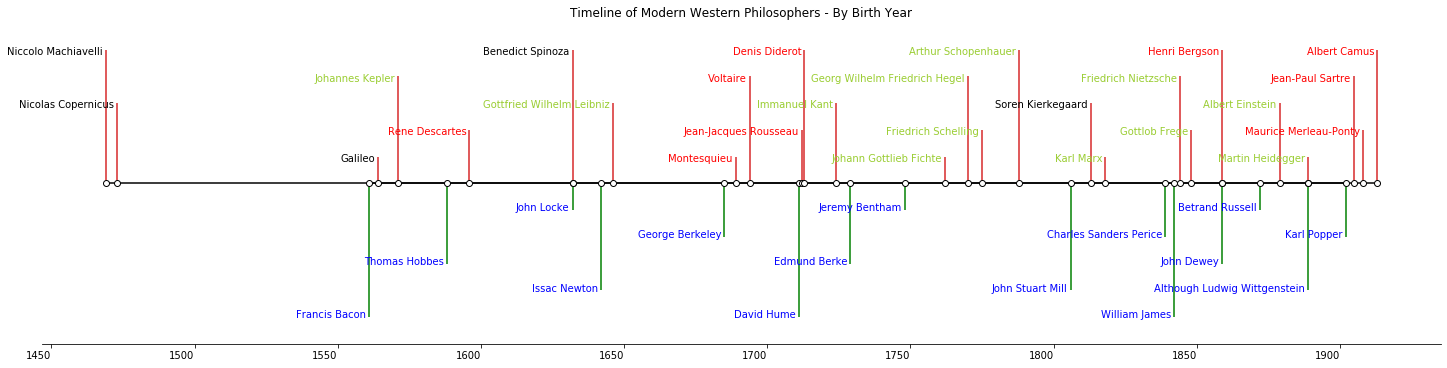

In [179]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
ax.set(title="Timeline of Modern Western Philosophers - By Birth Year")

markerline1, stemline1, baseline = ax.stem(d1['BirthYear'], d1['level'],
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(stemline1,color='g')
plt.setp(markerline1, mec="k", mfc="w", zorder=3)

markerline2, stemline2, baseline = ax.stem(d2['BirthYear'], d2['level'],
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
plt.setp(markerline2, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline1.set_ydata(np.zeros(len(d1)))
markerline2.set_ydata(np.zeros(len(d2)))

# annotate lines
# annotate location
# vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
# vert=['top' if l >0 else 'bottom' for l in levels]

for d, l, r, c in zip(d1['BirthYear'], d1['level'], d1['Name'], d1['color']):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", color=c, va='bottom', ha="right")

for d, l, r, c in zip(d2['BirthYear'], d2['level'], d2['Name'], d2['color']):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points",color=c, va='top', ha="right")


            
# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.YearLocator(50))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)

for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()    
    